In [24]:
import pandas as pd
import numpy as np

# 合并数据集

In [2]:
# DataFrame 合并
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],
                    'data1':range(7)})
df2 = pd.DataFrame({'key':['a','b','d'],
                    'data2':range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [3]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [4]:
# 多对一的合并,df1中有多个被标记为a和b,df2中key列的每个值则仅对于一行
# 如果没有指定，merge会将重叠的列名当作键，建议还是显式指定下
# 默认情况下，merge做的是“inner”连接，结果中的键是交集，也有‘left’,'right','outer',外连接求取的是键的并集
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [8]:
pd.merge(df1,df2,how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [6]:
pd.merge(df1,df2,on = 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [7]:
# 如果两个数据的列名不一样，也可以分别进行指定
df3 = pd.DataFrame({'lkey':['b','b','a','c','a','a','b'],
                 'data1':range(7)})
df4 = pd.DataFrame({'rkey':['a','b','d'],
                    'data2':range(3)})
pd.merge(df3,df4,left_on='lkey',right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


### 多对多的merge(合并)操作
### 连接方式只影响出现在结果中的键

In [9]:

df1 = pd.DataFrame({'key':['b','b','a','c','a','b'],
                    'data1':range(6)})
df2 = pd.DataFrame({'key':['a','b','a','b','d'],
                    'data2':range(5)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [10]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [11]:
# 多对多连接产生的是行的笛卡尔积，左边df1有3个'b'行，右边有2个，则最终结果中有6(2*3)个‘b’行。
# 连接方式只影响出现在结果中的键
pd.merge(df1,df2,on='key',how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [12]:
pd.merge(df1,df2,on='key',how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [13]:
# 根据多个键进行合并，出入一个由列组成的列表即可
left = pd.DataFrame({'key1':['foo','foo','bar'],
                     'key2':['one','two','one'],
                     'lval':[1,2,3]})
right = pd.DataFrame({'key1':['foo','foo','bar','bar'],
                      'key2':['one','one','one','two'],
                      'rval':[4,5,6,7]})
pd.merge(left,right,on=['key1','key2'],how='outer')  # 结果有1*2+1+1*1+1=5条数据


,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [14]:
# 对重复列名的处理，suffixes用于指定附加到左右两个DataFrame对象的重叠列名上的字符串
pd.merge(left,right,on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [15]:
pd.merge(left,right,on='key1',suffixes=('_left','_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


## 索引上的合并
### DataFrame中的连接键位于其索引中，用left_index=True、right_index=True说明索引应该被用作链接键

In [19]:
left1 = pd.DataFrame({'key':['a','b','a','a','b','c'],
                      'value':range(6)})
right1 = pd.DataFrame({'gruop_val':[3.5,7]},index=['a','b'])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [20]:
right1

,gruop_val
a,3.5
b,7.0


In [21]:
pd.merge(left1,right1,left_on='key',right_index=True)

,key,value,gruop_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [22]:
pd.merge(left1,right1,left_on='key',right_index=True,how='outer')

,key,value,gruop_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [26]:
# 对于层次化索引的数据
lefth = pd.DataFrame({'key1':['Ohio','Ohio','Ohio','Nevada','Nevada'],
                      'key2':[2000,2001,2002,2001,2002],
                      'data':np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6,2)),
                      index=[['Nevada','Nevada','Ohio','Ohio','Ohio','Ohio'],
                             [2001,2000,2000,2000,2001,2002]],
                     columns=['event1','event2'])
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [27]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [29]:
pd.merge(lefth,righth,left_on=['key1','key2'],right_index=True)  # inner链接

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [30]:
pd.merge(lefth,righth,left_on=['key1','key2'],right_index=True,how='outer')  # outer 链接

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [32]:
# 合并双方的索引
left2 = pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]],index=['a','c','e'],columns=['Ohio','Nevada'])
right2 = pd.DataFrame([[7.,8.],[9.,10.],[11.,12.],[13.,14.]],index=['b','c','d','e'],columns=['Missouri','Alabama'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [33]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [34]:
pd.merge(left2,right2,left_index=True,right_index=True,how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


## join 更方便的实现按索引合并  默认是进行左连接的

In [35]:
left2.join(right2,how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [36]:
left1.join(right1,on='key')

,key,value,gruop_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [37]:
# 可以向join中传入一组DataFrame
another = pd.DataFrame([[7.,8.],[9.,10.],[11.,12.],[16.,17.]],index=['a','c','e','f'],columns=['New York','Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [38]:
left2.join([right2,another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [39]:
left2.join([right2,another],how='outer')

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\pandas\core\frame.py:6359: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  verify_integrity=True)


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


# 轴向链接
## numpy有concatenate函数 连接
## pandas有concat函数 连接
## stacking 堆叠

In [40]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [41]:
# numpy 有 concatenate函数
np.concatenate([arr,arr],axis=1)  # 按列拼接

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [42]:
s1 = pd.Series([0,1],index=['a','b'])
s2 = pd.Series([2,3,4],index=['c','d','e'])
s3 = pd.Series([5,6],index=['f','g'])


In [44]:
# concat将值和索引粘合在一起，默认情况下，concat是在axis=0上连接的，最终产生一个新的Series
# axis=0是行，axis=1是列
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [46]:
pd.concat([s1,s2,s3],axis=1)  # 按列，外连接

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [48]:
s4 = pd.concat([s1*5,s3])
s4


a    0
b    5
f    5
g    6
dtype: int64

In [49]:
pd.concat([s1,s4],axis=1)  

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [50]:
pd.concat([s1,s4],axis=1,join='inner')  #传入join='inner'即可得到交集

,0,1
a,0,0
b,1,5


In [52]:
# join_axes 指定在其他轴上使用索引
pd.concat([s1,s4],axis=1,join_axes=[['a','c','b','e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [56]:
# 想要在连接轴上创建一个层次化索引，使用keys参数即可
result = pd.concat([s1,s1,s3],keys=['one','two','three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [57]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [59]:
# 如果沿着axis=1对Seires进行合并，keys就会成为DataFrame的列头
pd.concat([s1,s1,s3],axis=1,keys=['one','two','three'])

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,one,two,three
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [62]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2),index=['a','b','c'],columns=['one','two'])
df2 = pd.DataFrame(5+np.arange(4).reshape(2,2),index=['a','c'],columns=['three','four'])
pd.concat([df1,df2],axis=1,keys=['level1','level2'])

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [63]:
# 如果传入的不是类表，而是一个字典，则字典会被当做keys的选项值
pd.concat({'level1':df1,'level2':df2},axis=1)

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [64]:
pd.concat([df1,df2],axis=1,keys=['level1','level2'],names=['upper','lower'])

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [65]:
df1 = pd.DataFrame(np.random.randn(3,4),columns=['a','b','c','d'])
df2 = pd.DataFrame(np.random.randn(2,3),columns=['b','d','a'])
df1

,a,b,c,d
0,-0.232564,0.130717,0.017631,-1.859492
1,-0.885000,-0.078071,0.475271,0.303917
2,-0.704978,-0.599024,0.250430,-1.173361


In [66]:
df2

,b,d,a
0,-0.191844,-2.244116,0.699517
1,1.656763,0.153558,-0.781699


In [67]:
pd.concat([df1,df2],ignore_index=True)  # 不保留链接轴上的索引

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,-0.232564,0.130717,0.017631,-1.859492
1,-0.885000,-0.078071,0.475271,0.303917
2,-0.704978,-0.599024,0.250430,-1.173361
3,0.699517,-0.191844,NaN,-2.244116
4,-0.781699,1.656763,NaN,0.153558


## 合并重叠数据

In [68]:
a = pd.Series([np.nan,2.5,np.nan,3.5,4.5,np.nan],index=['f','e','d','c','b','a'])
b = pd.Series(np.arange(len(a),dtype=np.float64),index=['f','e','d','c','b','a'])
b[-1]=np.nan
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [69]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [70]:
np.where(pd.isnull(a),b,a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [71]:
# combine_first方法，实现上述功能，而且会进行数据对齐
b[:-2].combine_first(a[2:])  # 索引相同的值中，如果b中nan则用a中的值代替，否则保留b中的值

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [72]:
# combine_first也会在列上做同样的事
df1 = pd.DataFrame({'a':[1.,np.nan,5.,np.nan],
                    'b':[np.nan,2.,np.nan,6.],
                    'c':range(2,18,4)})
df2 = pd.DataFrame({'a':[5.,4.,np.nan,3.,7.],
                    'b':[np.nan,3.,4.,6.,8.]})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [73]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [74]:
df1.combine_first(df2) 

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


# 重塑和轴向旋转

## stack:将数据的列“旋转”为行
## unstack: 将数据的行“旋转”为列

In [75]:
data = pd.DataFrame(np.arange(6).reshape(2,3),
                    index=pd.Index(['Ohio','Colorado'],name='state'),
                    columns=pd.Index(['one','two','three'],name = 'number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [77]:
result =data.stack()  #stack将列转换为行得到一个Series
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [78]:
# 对于一个层次化索引的Series，用unstack将其重排为一个DataFrame
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [79]:
# 对一个层次化索引的Series，默认情况下，unstack操作的是最内层（stack也是一样），传入分层级别的编号或名称即可对其他级别进行unstack操作
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [80]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [83]:
# 如果不是所有的级别值都能在各分组中找到的话，则unstack操作可能会引入缺失数据
s1 = pd.Series([0,1,2,3],index=['a','b','c','d'])
s2 = pd.Series([4,5,6],index=['c','d','e'])
data2 = pd.concat([s1,s2],keys=['one','two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [84]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [86]:
# stack默认会滤除缺失数据，因此该运算是可逆的
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [87]:
data2.unstack().stack(dropna=False)  # 也可以设置不过滤缺失数据

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [88]:
df = pd.DataFrame({'left':result,'right':result+5},
                   columns = pd.Index(['left','right'],name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [89]:
# 对DataFrame进行unstack操作时，作为旋转轴的界别将会成为结果中的最低级别
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [90]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

In [128]:
# 将“长格式”转换为“宽格式”
from datetime import datetime
# 生成时间序列数据
date=pd.Series(pd.date_range('3-31-1959',periods=10))
date[:3]=pd.Series(pd.date_range('3-31-1959',periods=1)[0])[0]
date[3:6]=pd.Series(pd.date_range('6-30-1959',periods=1)[0])[0]
date[6:9]=pd.Series(pd.date_range('9-30-1959',periods=1)[0])[0]
date[9]=pd.Series(pd.date_range('12-31-1959',periods=1)[0])[0]
ldate = []
for item in date:
    format_birth =datetime.strftime(item,"%Y-%m-%d %H:%M:%S")
    ldate.append(format_birth)
ldate =pd.Series(ldate)

item =['reakgbp','infl','unemp']*3 
item.append('reakgbp')
item = pd.Series(item)
value = pd.Series([2710.349,0.000,5.800,2778.801,2.340,5.100,2775.488,2.740,5.300,2785.204])

ldata=pd.concat([ldate,item,value],axis=1,keys=['date','item','value'])
ldata

,date,item,value
0,1959-03-31 00:00:00,reakgbp,2710.349
1,1959-03-31 00:00:00,infl,0.000
2,1959-03-31 00:00:00,unemp,5.800
3,1959-06-30 00:00:00,reakgbp,2778.801
4,1959-06-30 00:00:00,infl,2.340
5,1959-06-30 00:00:00,unemp,5.100
6,1959-09-30 00:00:00,reakgbp,2775.488
7,1959-09-30 00:00:00,infl,2.740
8,1959-09-30 00:00:00,unemp,5.300
9,1959-12-31 00:00:00,reakgbp,2785.204


In [129]:
# pivot实现：不同的item值分别形成一列，date类中的时间值作为行索引，value 是值
pivoted = ldata.pivot('date','item','value') # 前两个采纳数值分别用作行和列索引，最后一个参数值填充DataFrame
pivoted

item,infl,reakgbp,unemp
date,,,
1959-03-31 00:00:00,0.00,2710.349,5.8
1959-06-30 00:00:00,2.34,2778.801,5.1
1959-09-30 00:00:00,2.74,2775.488,5.3
1959-12-31 00:00:00,NaN,2785.204,NaN


In [130]:
ldata['value2'] = np.random.randn(len(ldata))
ldata

,date,item,value,value2
0,1959-03-31 00:00:00,reakgbp,2710.349,0.618875
1,1959-03-31 00:00:00,infl,0.000,-0.912811
2,1959-03-31 00:00:00,unemp,5.800,0.322775
3,1959-06-30 00:00:00,reakgbp,2778.801,-1.239162
4,1959-06-30 00:00:00,infl,2.340,-0.903653
5,1959-06-30 00:00:00,unemp,5.100,-0.199938
6,1959-09-30 00:00:00,reakgbp,2775.488,-0.293935
7,1959-09-30 00:00:00,infl,2.740,0.446626
8,1959-09-30 00:00:00,unemp,5.300,1.233991
9,1959-12-31 00:00:00,reakgbp,2785.204,0.907076


In [131]:
# 如果忽略最后一个参数，得到的DataFrame是带有层次的
pivoted = ldata.pivot('date','item')
pivoted

value                    value2                    
item                 infl   reakgbp unemp      infl   reakgbp     unemp
date                                                                   
1959-03-31 00:00:00  0.00  2710.349   5.8 -0.912811  0.618875  0.322775
1959-06-30 00:00:00  2.34  2778.801   5.1 -0.903653 -1.239162 -0.199938
1959-09-30 00:00:00  2.74  2775.488   5.3  0.446626 -0.293935  1.233991
1959-12-31 00:00:00   NaN  2785.204   NaN       NaN  0.907076       NaN

In [132]:
pivoted['value']

item,infl,reakgbp,unemp
date,,,
1959-03-31 00:00:00,0.00,2710.349,5.8
1959-06-30 00:00:00,2.34,2778.801,5.1
1959-09-30 00:00:00,2.74,2775.488,5.3
1959-12-31 00:00:00,NaN,2785.204,NaN


In [134]:
# pivot是一个快捷方式，可以用set_index创建层次话索引，再用unstack重塑
unstacked = ldata.set_index(['date','item']).unstack('item')
unstacked

value                    value2                    
item                 infl   reakgbp unemp      infl   reakgbp     unemp
date                                                                   
1959-03-31 00:00:00  0.00  2710.349   5.8 -0.912811  0.618875  0.322775
1959-06-30 00:00:00  2.34  2778.801   5.1 -0.903653 -1.239162 -0.199938
1959-09-30 00:00:00  2.74  2775.488   5.3  0.446626 -0.293935  1.233991
1959-12-31 00:00:00   NaN  2785.204   NaN       NaN  0.907076       NaN

# 数据转换

## 移除重复的数据
### duplicated返回一个布尔型Series,表示各行是否是重复行
### drop_duplicates(),用于返回一个移除了重复行的DataFrame

In [135]:
data = pd.DataFrame({'k1':['one']*3+['two']*4,
                     'k2':[1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [136]:
# DataFrame的duplicated返回一个布尔型Series,表示各行是否是重复行
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [137]:
# drop_duplicates(),用于返回一个移除了重复行的DataFrame
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [138]:
# duplicated和drop_duplicates两个方法默认会判断全部列，你也可以指定部分类进行重复项判断
data['v1']=range(7)
data.drop_duplicates(['k1']) # 按k1列过滤重复项，默认保留的是第一个出现的值组合

,k1,k2,v1
0,one,1,0
3,two,3,3


In [140]:
# keep='last'：在过滤重复项的时候，保留最后一个出现的值
data.drop_duplicates(['k1','k2'],keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


## 利用函数或映射进行数据转换

In [141]:
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami','corned beef','Bacon','pastrami','honey ham','nova lox'],
                     'ounces':[4,3,12,6,7.5,8,3,5,6]
                    })
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [142]:
# 添加一列表示该肉类食物来源的动物类型
meat_to_animal ={'bacon':'pig',
                'pulled pork':'pig',
                'pastrami':'cow',
                'corned beef':'cow',
                'honey ham':'pig',
                'nova lox':'salmon'}


In [144]:
# Series的map方法可以接受一个函数或含有映射关系的字典型对象
# 先把food里面的数据转换为小写，再映射
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [145]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

## 替换值 
### fillna  replace

In [146]:
data = pd.Series([1.,-999.,2.,-999.,-1000.,3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [147]:
# replace将-999替换为NA，产生一个新的Series
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [148]:
# 一次替换多个值
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [149]:
data.replace([-999,-1000],[np.nan,0]) # 不同的值进行不同的替换

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [150]:
data.replace({-999:np.nan,-1000:0})  # 也可以用字典进行替换

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## 重命名轴索引

In [151]:
data = pd.DataFrame(np.arange(12).reshape(3,4),
                   index =['Ohio','Colorado','New York'],
                   columns=['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [152]:
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [155]:
data.index = data.index.map(str.upper)  # 将index就地修改
data.index

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [156]:
# 创建数据集的转换板（不是修改原始数据）用rename
data.rename(index=str.title,columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [157]:
# rename可以结合字典型对象实现对部分轴标签的更新
data.rename(index={'OHIO':'INDIANA'},
            columns={'three':'peekaboo'})


,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [159]:
# 如果想就地改某个数据集，rename中传入inplace=True即可
data.rename(index={'OHIO':"INDIANA"},inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


## 离散化和面元划分

In [164]:
# 将一组数据划分为不同的年龄组
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
# 用cut函数 将数据划分为“18-25”、“26-35”、‘35-60’、‘60以上’
bins =[18,25,35,60,100]
cats = pd.cut(ages,bins) # 默认为左开右闭区间，可通过right=False变为左闭右开
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [166]:
cats.codes  # 每个值对应的标号

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [167]:
cats.categories  # 划分的区间

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [168]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [171]:
pd.cut(ages,[18,26,36,61,100],right=False) 


[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [173]:
group_name =['Youth','YoungAdult','MiddleAged','Senior']
pd.cut(ages,bins,labels=group_name) # labels选项设置为一个列表或数组，设置面元名称

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [180]:
# 如果向cut传入的是面元的数量，而不是确切的面元边界，则它会根据数据的最小值和最大值计算等长面元
data = np.random.rand(20)
pd.cut(data,4,precision=2)  # 将均匀分布的数据分成4组

[(0.0067, 0.24], (0.24, 0.48], (0.48, 0.71], (0.24, 0.48], (0.0067, 0.24], ..., (0.71, 0.95], (0.48, 0.71], (0.71, 0.95], (0.0067, 0.24], (0.0067, 0.24]]
Length: 20
Categories (4, interval[float64]): [(0.0067, 0.24] < (0.24, 0.48] < (0.48, 0.71] < (0.71, 0.95]]

In [181]:
# qcut 根据样本分位数对数据进行面元划分
# cut  可能无法使各个面元中含有相同数量的数据点，qcut可以等到大小基本相等的面元
data = np.random.randn(1000) # 正态分布
cats = pd.qcut(data,4) # 按四分位数进行切割
cats

[(0.0118, 0.659], (0.659, 3.08], (0.0118, 0.659], (0.659, 3.08], (-0.652, 0.0118], ..., (0.659, 3.08], (0.659, 3.08], (0.659, 3.08], (0.0118, 0.659], (0.0118, 0.659]]
Length: 1000
Categories (4, interval[float64]): [(-3.004, -0.652] < (-0.652, 0.0118] < (0.0118, 0.659] < (0.659, 3.08]]

In [182]:
pd.value_counts(cats)

(0.659, 3.08]       250
(0.0118, 0.659]     250
(-0.652, 0.0118]    250
(-3.004, -0.652]    250
dtype: int64

In [185]:
# 也可以设置自定义的分位数（0-1之间的数值，包括端点）
pd.qcut(data,[0,0.1,0.5,0.9,1])

[(0.0118, 1.255], (1.255, 3.08], (0.0118, 1.255], (0.0118, 1.255], (-1.275, 0.0118], ..., (0.0118, 1.255], (0.0118, 1.255], (0.0118, 1.255], (0.0118, 1.255], (0.0118, 1.255]]
Length: 1000
Categories (4, interval[float64]): [(-3.004, -1.275] < (-1.275, 0.0118] < (0.0118, 1.255] < (1.255, 3.08]]

## 检测和过滤异常值

In [186]:
np.random.seed(12345)
data = pd.DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [187]:
# 找出某列中绝对值大小超过3的值
col = data[3]
col[np.abs(col)>3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [191]:
# 找出全部含有“超过3或-3的值”的行，可以用布尔型DataFrame 或 any()
data[(np.abs(data)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [192]:
# 将值限制在区间-3 到 3 以内
data[np.abs(data)>3] = np.sign(data)*3  # np.sign（）返回一个由-1和1组成的数组，表示原始值的符号
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


## 排列和随机采样

In [193]:
# numpy.random.permutation：随机重排序，产生一个表示新顺序的整数数组
df = pd.DataFrame(np.arange(5*4).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [195]:
sampler = np.random.permutation(5)
sampler

array([1, 3, 4, 0, 2])

In [197]:
# 在基于ix的索引操作或take函数中使用该数组了
df.take(sampler)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [199]:
# 不想用替换的方式选取随机子集 则用permutation：从permutation返回的数组中切下前K个元素，其中K为期望的子集大小
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3


In [200]:
# 通过替换的方式产生样本，通过np.random.randint得到乙组随机整数
bag = np.array([5,7,-1,6,4])
sampler = np.random.randint(0,len(bag),size=10)  # size:样本量
sampler

array([2, 2, 0, 3, 0, 4, 1, 1, 2, 3])

In [202]:
draws = bag.take(sampler)
draws

array([-1, -1,  5,  6,  5,  4,  7,  7, -1,  6])

## 计算指标/哑变量

In [ ]:
# 将分类变量转换为 哑变量矩阵 或 指标矩阵
# get_dummies:将dataFrame中某一列含有k个不同的值，派生出k列矩阵（其值全为1和0）

In [204]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'],
                   'data1':range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [205]:
pd.get_dummies(df['key'])  # one-hot 

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [209]:
dummies = pd.get_dummies(df['key'],prefix='key')  # prefix='key':给列名加上一个前缀
# dummies = dummies.add_prefix('key_')  # 给列名加上一个前缀，和上面是等价的
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [213]:
import os
root_path = str(os.getcwd()).replace("\\", "/")  #取当前目录
path = root_path +'/datasets/movielens/'
# 某行同属于多个分类
mnames = ['movie_id','title','genres']
movies = pd.read_table(path+'movies.dat',engine='python',sep='::',header=None,names=mnames)
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [217]:
# 从数据集中抽取不同的genre值
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))  # 返回多个集合的并集，即包含了所有集合的元素，重复的元素只会出现一次
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [221]:
dummies = pd.DataFrame(np.zeros((len(movies),len(genres))),columns=genres)
# 迭代每一部电影并将dummies各行的项设置为1
for i,gen in enumerate(movies.genres):
    dummies.ix[i,gen.split('|')]=1
# 再与movies合并起来
movies_withdic = movies.join(dummies.add_prefix('Genre_'))  # add_prefix增加列名的前缀
movies_withdic.ix[0]
    

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [223]:
# 结合get_dummies和cut之类的离散化函数
values = np.random.rand(10)
values

array([0.96588737, 0.17373658, 0.87592824, 0.75415641, 0.163486  ,
       0.23784062, 0.85564381, 0.58743194, 0.15314009, 0.5950288 ])

In [225]:
bins = np.arange(0,1.2,0.2)
pd.get_dummies(pd.cut(values,bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,1,0,0,0,0
5,0,1,0,0,0
6,0,0,0,0,1
7,0,0,1,0,0
8,1,0,0,0,0
9,0,0,1,0,0


# 字符串操作

## 字符串对象方法

In [237]:
# 以逗号分隔的字符串可以用split拆分成数段
val = 'a,b, guido'
val.split(',')

['a', 'b', ' guido']

In [238]:
# split常常结合strip（用于修剪空白符（包括换行符））一起作用
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [239]:
# 用加法，可以将这些子字符串以双冒号分隔符的形式连接起来
first,second,third = pieces
first+"::"+second+"::"+third

'a::b::guido'

In [240]:
# 更快的方式是：向字符串“::”的join方法传入一个列表或元组
"::".join(pieces)

'a::b::guido'

In [241]:
# 子串定位，检测子串的最佳方式是利用python的in关键字（也可以用index 和 find）
'guido' in val

True

In [242]:
val.index(',')  # index 找不到的话 会报错


1

In [244]:
val.find(':')  # find找不到会返回-1，不会报错

-1

In [245]:
val.count(',')  # 指定子串出现次数

2

In [246]:
# replace 用于将制定模式替换为另一个模式，也常常用于删除模式：传入空字符串
val.replace(',','::')  # 'a::b:: guido'

'a::b:: guido'

In [247]:
val.replace(',','')   # 'ab guido'

'ab guido'

# 正则表达式  regrex

In [248]:
import re  # re模块的函数分为三大类：模式匹配、替换、拆分

In [249]:
# 描述一个或多个空白符的regrex是\s+
text = "foo  bar\t baz   \tqux"
re.split('\s+',text)  # 正则表达式会先被编译，然后再在text调用split方法

['foo', 'bar', 'baz', 'qux']

In [251]:
# 用re.compile()自己编译regex以得到一个可重用的regex对象
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [252]:
# 如果希望得到匹配regex的所有模式，可用findall方法
regex.findall(text)

['  ', '\t ', '   \t']

In [272]:
# findall返回的是字符串中所有的匹配项
# search只返回第一个匹配项
# match只匹配字符串的首部

text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""
text

'Dave dave@google.com\nSteve steve@gmail.com\nRob rob@gmail.com\nRyan ryan@yahoo.com'

In [299]:
pattern = r'[a-zA-Z0-9._%+-]+@[a-zA_Z0-9.-]+\.[a-zA-Z]{2,4}'
regex = re.compile(pattern)
# 对text使用findall得到一组电子邮件地址
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [300]:
test1="who you are,what you do,When you get get there? What is time you state there?"
regex1=re.compile(r'\w*wh\w*',re.IGNORECASE) # re.IGNORECASE对大小写不敏感
wh=regex1.findall(test1)
print(wh)

['who', 'what', 'When', 'What']


In [302]:
# search 返回文本中第一个电子邮件地址(以特殊的匹配项对象形式返回)
m = regex.search(text)
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [304]:
# 匹配项对象智能告诉我们模式在原字符串中的起始和结束位置
text[m.start():m.end()]

'dave@google.com'

In [305]:
# match将返回None，因为她只匹配出现在字符串开头的模式
print(regex.match(text))

None


In [306]:
# sub它会将匹配到的模式替换为指定的字符串，并返回所得到的的新字符串
print(regex.sub('REDACTED',text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED


In [308]:
# 不仅想得到电子邮件地址，而且还想将各地址分成三部分（用户名、域名、域后缀）
# 要实现上面功能，只需将待分段的模式的各部分用圆括号包起来
pattern = r'([a-zA-Z0-9._%+-]+)@([a-zA_Z0-9.-]+)\.([a-zA-Z]{2,4})'
regex = re.compile(pattern)
# 通过groups返回一个由模式各段组成的元组
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [309]:
# 对于带有分组功能的模式，findall会返回一个元组列表
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [310]:
# sub还能通过诸如\1、\2之类的特符号访问各匹配项中的分组
print(regex.sub(r'Username: \1,Domain: \2,Suffix: \3',text))

Dave Username: dave,Domain: google,Suffix: com
Steve Username: steve,Domain: gmail,Suffix: com
Rob Username: rob,Domain: gmail,Suffix: com
Ryan Username: ryan,Domain: yahoo,Suffix: com


In [317]:
# 为各个匹配分组加上一个名称
regex = re.compile(r"""(?P<username>[a-zA-Z0-9._%+_]+)@(?P<domain>[a-zA-Z0-9.-]+)\.(?P<suffix>[a-zA-Z]{2,4})""")
m = regex.match('wesm@bright.net')
m.groupdict()

{'username': 'wesm', 'domain': 'bright', 'suffix': 'net'}

## pandas 中矢量化的字符串函数

In [320]:
data = {'Dave':'dave@google.com','Steve':'steve@gmail.com','Rob':'rob@gmail.com','Wes':np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [321]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [323]:
# 通过Series的str属性即可访问字符串操作方法，并且会跳过NA值 
data.str.contains('gmail')  # contains依据的是re.search，返回布尔值

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [343]:
data.str.match(pattern)  # match依据的是re.match，返回布尔值


Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [333]:
m= data.str.findall(pattern)
m

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [336]:
m.str[0][1]

('steve', 'gmail', 'com')

In [341]:
m.str[0].get(0)

('dave', 'google', 'com')

In [342]:
m.str[:5]

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

# USDA食品数据库

In [346]:
import os
import json
root_path = str(os.getcwd()).replace("\\", "/")  #取当前目录
filePath = root_path +'/datasets/usda_food/database.json'
db = json.load(open(filePath))
len(db)

6636

In [347]:
# db中每个条目都是一个含有某种食物全部数据的字典
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [348]:
# nutrients字段是一个字典列表，其中的每个字典对应一种营养成分
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [349]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [350]:
# 取出食物的名称、分类、编号一级制造商等信息
info_keys = ['description','group','id','manufacturer']
info = pd.DataFrame(db,columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [351]:
# 查看食物类别的分布情况
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [352]:
nutrients =[]
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients,ignore_index=True)
len(nutrients)

389355

In [353]:
nutrients[:20]

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [354]:
# 检查是否有重复项
nutrients.duplicated().sum()

14179

In [356]:
# 如果有重复项，直接去重
nutrients = nutrients.drop_duplicates()
len(nutrients)

375176

In [357]:
# nutrients和info里都有‘group’和‘decription’,所以需要进行重命名
# 先对食物里面的进行重命名
col_mapping = {'description':'food','group':'fgroup'}
info = info.rename(columns=col_mapping,copy=False)
info[:5]

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [358]:
# 先对nutrients里面的进行重命名
col_mapping = {'description':'nutrient','group':'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping,copy=False)
nutrients[:5]

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [359]:
#将info和nutrients合并
ndata = pd.merge(nutrients,info,on='id',how='outer')
ndata.shape

(375176, 8)

In [361]:
ndata.columns

Index(['nutrient', 'nutgroup', 'units', 'value', 'id', 'food', 'fgroup',
       'manufacturer'],
      dtype='object')

In [362]:
ndata.ix[30000]

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

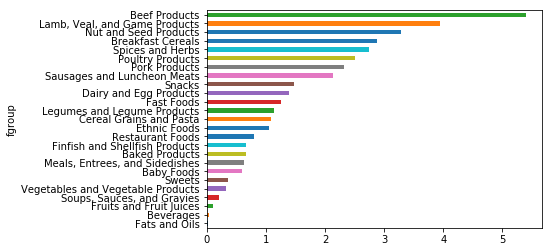

In [379]:
# 根据食物分类和营养成分类型画出中位值图
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')
plt.show()

In [414]:
# 各营养成分最为丰富的食物是什么？
by_nutrient = ndata.groupby(['nutgroup','nutrient'])

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
Name: value, dtype: float64

In [419]:
get_maximum = lambda x:x.xs(x.value.idxmax())
get_minimum = lambda x:x.xs(x.value.idxmin())
max_foods = by_nutrient.apply(get_maximum)[['value','food']]  #获取值最大的食物
print(max_foods[:10])


                             value  \
nutgroup    nutrient                 
Amino Acids Alanine          8.009   
            Arginine         7.436   
            Aspartic acid   10.203   
            Cystine          1.307   
            Glutamic acid   17.452   
            Glycine         19.049   
            Histidine        2.999   
            Hydroxyproline   0.803   
            Isoleucine       4.300   
            Leucine          7.200   

                                                                         food  
nutgroup    nutrient                                                           
Amino Acids Alanine                         Gelatins, dry powder, unsweetened  
            Arginine                             Seeds, sesame flour, low-fat  
            Aspartic acid                                 Soy protein isolate  
            Cystine              Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                 Soy p

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4317: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  stacked_values = np.vstack(map(np.asarray, values))


In [420]:
# 让food小一点
max_foods.food = max_foods.food.str[:50]
# 给出'Amino Acids'的营养分组
max_foods.ix['Amino Acids']['food']

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 